## 1. Procesamiento	de	texto	básico	con	SciKit-learn

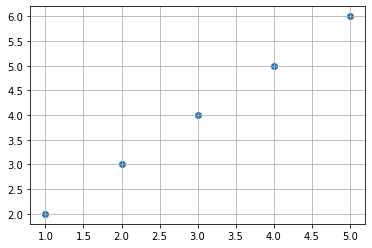

In [41]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[1,2], [2,3], [3,4], [4,5], [5,6]])
x = data[:,0]
y= data[:,1]

plt.scatter(x,y)
plt.grid(True)
plt.show()

## 2.	Preprocesamiento	de	Texto	con	SciKit-learn

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

Una	vez	que	hemos	creado	la	instancia,	podemos	utilizarlo	para	extraer	una	bolsa	de
palabras

In [43]:
content = ["How to format my hard disk", " Hard disk format problems "]
X = vectorizer.fit_transform(content)

fit_transform ha	extraído	siete	características	de	los	dos	“documentos”;
podemos	ver	eso	con	el	método	get_feature_names().

In [44]:
vectorizer.get_feature_names()

D:\Dev\source\PLN-Notebook\venv-cp310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

Se	puede	ver	cuántas	veces	cada	una	de	estas	siete	features se	produce	en
los	dos	documentos	haciendo

In [45]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

Tenga	en	cuenta	que	esta	llamada	devuelve	una	matriz	de	dos	filas,	una	por
`documentos'.	Cada	fila	de	siete	elementos.	Cada	elemento	especifica	el	número
de	elementos	de	una	determinada	feature	se	produjo	en	ese	documento.
Entonces:

In [46]:
X.toarray()[0]

array([1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [47]:
X.toarray()[1,2]

1

El	set	de	datos	se	puede	encontrar	en:
https://qwone.com/~jason/20Newsgroups/
Pero	ya	está	incluido	en	scikit-learn	y	se	puede	cargar	en	Python	haciendo

Para	acelerar	las	cosas,	en	el	resto	del	laboratorio	sólo	utilizaremos	un	subconjunto
de	los	documentos,	los	que	pertenecen	a	las	siguientes	4	categorías

In [48]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

train_counts = vectorizer.fit_transform(twenty_train.data)

vectorizer.vocabulary_.get('algorithm')

4690

In [50]:
len(vectorizer.get_feature_names())

35788

In [51]:
vectorizer = CountVectorizer(stop_words = 'english')

sorted(vectorizer.get_stop_words())[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

## 3.	Pre-procesamiento	más	avanzado	con	NLTK

El	steamming	en	 NLTK incluye	implementaciones	de	varios algoritmos
muy	conocidos y	utilizados, incluyendo	el	Porter	Stemmer	y	el	Lancaster
Stemmer.	(Ver http://www.nltk.org/howto/stem.html para	una
introducción	general	y http://www.nltk.org/api/nltk.stem.html		para
más	detalles,	incluyendo	los	idiomas	cubiertos)

In [52]:
import nltk
from pathlib import Path
nltk.data.path = [str(Path().resolve().parent.joinpath("nltk_data"))]

s = nltk.stem.SnowballStemmer('english')

Después	de	crear	el	steammer,	a	continuación,	puede	utilizarlo	para	llevar	a	la
raíz	(steam) palabras	de	la	siguiente	manera:

In [53]:
s.stem("cats")

'cat'

In [54]:
s.stem("loving")

'love'

Otros	tipos	de	pre-procesamiento	de	NLTK	incluye	implementaciones	de
muchos	de	los	módulos	de	procesamiento previo	y	analizadores
sintácticos	que	discutimos	o	discutiremos	en	las clases:
- identificadores	de	idioma
- tokenizers	para	varios	idiomas
- divisores	de	oraciones
- POS	taggers
- Chunkers
- Parsers
Además,	NLTK	incluye	implementaciones	de	los	aspectos	del	análisis	de	texto
que	vamos	a	discutir	en	este	módulo,	incluyendo
- NER	(Named	Entity	Recognition)
- Análisis	de	los	sentimientos
- Extraer	información	de	los	medios	de	redes sociales

In [55]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
text = word_tokenize("And now for something completely different")

producir	una	versión	tokenizada	de	la	frase,	que	luego	puede	ser	alimentado	en	el
etiquetador	POS	(	puede	que tenga	que	descargar	el	paquete	'	maxent_...'	para	hacer
esto)

In [56]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_treebank_pos_tagger')
nltk.pos_tag(text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pfranco\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\pfranco\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

## 4.	La	integración	el	steammer	de	NLTK	con	el	CountVectorizer	de	SciKit-learn

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

analyze = vectorizer.build_analyzer()

analyze("John bought carrots and potatoes")

['john', 'bought', 'carrots', 'potatoes']

Si	 modificamos	build_analyzer	()	para	aplicar		el	steammer	de	NLTK	a	la	salida	del
método	build_analyzer	(),	obtenemos	una	versión	que	deriva	así:

In [58]:
import nltk.stem

english_stemmer	= nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):

    def	build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w)	for	w in analyzer(doc))

stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')

stem_analyze = stem_vectorizer.build_analyzer()

Y = stem_analyze("John bought carrots and potatoes")

for tok in Y:
    print(tok)

john
bought
carrot
potato


Si	utilizamos	este	Vectorizer	para	extraer	features	para	el	subconjunto	del
dataset	20_Newsgroups que	consideramos antes,	vamos	a	tener	un	menor
número	de	features

In [59]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism','soc.religion.christian','comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

train_counts = stem_vectorizer.fit_transform(twenty_train.data)

len(stem_vectorizer.get_feature_names())

26888

## SpanishStemmedCountVectorizer

In [60]:
import nltk.stem

spanish_stemmer	= nltk.stem.SnowballStemmer('spanish')

class SpanishStemmedCountVectorizer(CountVectorizer):

    def	build_analyzer(self):
        analyzer = super(SpanishStemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (spanish_stemmer.stem(w)	for	w in analyzer(doc))

stem_vectorizer = SpanishStemmedCountVectorizer(min_df=1)

stem_analyze = stem_vectorizer.build_analyzer()

text = '''
El universo (que otros llaman la Biblioteca) se compone de un número indefinido, y
tal vez infinito, de galerías hexagonales, con vastos pozos de ventilación en el medio,
cercados por barandas bajísimas. Desde cualquier hexágono se ven los pisos inferiores y
superiores: interminablemente. La distribución de las galerías es invariable. Veinte
anaqueles, a cinco largos anaqueles por lado, cubren todos los lados menos dos; su altura,
que es la de los pisos, excede apenas la de un bibliotecario normal. Una de las caras libres
da a un angosto zaguán, que desemboca en otra galería, idéntica a la primera y a todas. A
izquierda y a derecha del zaguán hay dos gabinetes minúsculos. Uno permite dormir de
pie; otro, satisfacer las necesidades finales. Por ahí pasa la escalera espiral, que se abisma
y se eleva hacia lo remoto. En el zaguán hay un espejo, que fielmente duplica las
apariencias. Los hombres suelen inferir de ese espejo que la Biblioteca no es infinita (si
lo fuera realmente ¿a qué esa duplicación ilusoria?); yo prefiero soñar que las superficies
bruñidas figuran y prometen el infinito... La luz procede de unas frutas esféricas que
llevan el nombre de lámparas. Hay dos en cada hexágono: transversales. La luz que
emiten es insuficiente, incesante.
'''

Y = stem_analyze(text)

for tok in Y:
    print(tok)

el
univers
que
otros
llam
la
bibliotec
se
compon
de
un
numer
indefin
tal
vez
infinit
de
gal
hexagonal
con
vast
poz
de
ventil
en
el
medi
cerc
por
barand
bajisim
desd
cualqui
hexagon
se
ven
los
pis
inferior
superior
intermin
la
distribu
de
las
gal
es
invari
veint
anaquel
cinc
larg
anaquel
por
lad
cubr
tod
los
lad
men
dos
su
altur
que
es
la
de
los
pis
exced
apen
la
de
un
bibliotecari
normal
una
de
las
car
libr
da
un
angost
zaguan
que
desemboc
en
otra
gal
ident
la
primer
tod
izquierd
derech
del
zaguan
hay
dos
gabinet
minuscul
uno
permit
dorm
de
pie
otro
satisfac
las
neces
final
por
ahi
pas
la
escaler
espiral
que
se
abism
se
elev
haci
lo
remot
en
el
zaguan
hay
un
espej
que
fielment
duplic
las
aparient
los
hombr
suel
infer
de
ese
espej
que
la
bibliotec
no
es
infinit
si
lo
fuer
realment
que
esa
duplic
ilusori
yo
prefier
soñ
que
las
superfici
bruñ
figur
promet
el
infinit
la
luz
proced
de
unas
frut
esfer
que
llev
el
nombr
de
lamp
hay
dos
en
cad
hexagon
transversal
la
luz
que
emit
es
insuficient